In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\Admin\\Documents\\DL_course_project\\train.csv")

In [4]:
dtest = pd.read_csv("C:\\Users\Admin\\Documents\\DL_course_project\\test.csv")

### Missing Values

* No missing values

In [5]:
# make a list of the variables that contain missing values
vars_with_na = data.columns[data.isnull().any()].tolist()
vars_with_na_test = dtest.columns[dtest.isnull().any()].tolist()
print (len(vars_with_na), len(vars_with_na_test))

0 0


### Group the Data [train and test]

In [6]:
train_test_data = [data, dtest]

In [7]:
# list of numerical variables
for dataset in train_test_data:
    num_vars = [var for var in dataset.columns if dataset[var].dtypes != 'O']

    print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  370
Number of numerical variables:  369


### Check for value greater than 1

In [8]:
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
Xdatanum = data[num_vars].drop(["ID", "y"], axis = 1)
for var in Xdatanum.columns:
    if Xdatanum[var].max()>1:
        print ("there are value greater than 1")

In [9]:
# list of categorical variables
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

# visualise the numerical variables
data[cat_vars].head()

Number of categorical variables:  8


,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


### Looking at individual plot

* change the label column

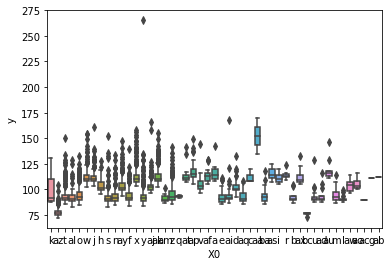

In [11]:
sns.boxplot(x = data["X0"] , y = "y" , data= data)

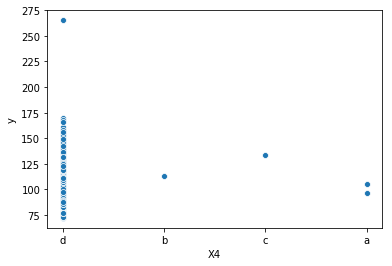

In [12]:
sns.scatterplot(x = data["X4"] , y = "y" , data= data)

### Suspicious data

In [13]:
suspiciousData = []

for col in data:
    
    if len(data[col].unique()) == 1:
        suspiciousData.append(col)
data[suspiciousData].describe()

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
count,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Drop suspicious features

In [14]:
for dataset in train_test_data:

    dataset = dataset.drop(suspiciousData, 1, inplace = True)

### Type of data

In [15]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,357
1,float64,1
2,object,8


## Target analysis

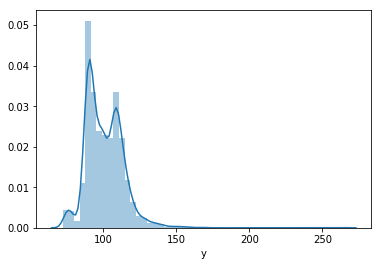

In [16]:
sns.distplot(data["y"])

In [17]:
data["y"].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

## Categorical data

In [18]:
categoricalData = data[cat_vars]
categoricalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 8 columns):
X0    4209 non-null object
X1    4209 non-null object
X2    4209 non-null object
X3    4209 non-null object
X4    4209 non-null object
X5    4209 non-null object
X6    4209 non-null object
X8    4209 non-null object
dtypes: object(8)
memory usage: 263.2+ KB


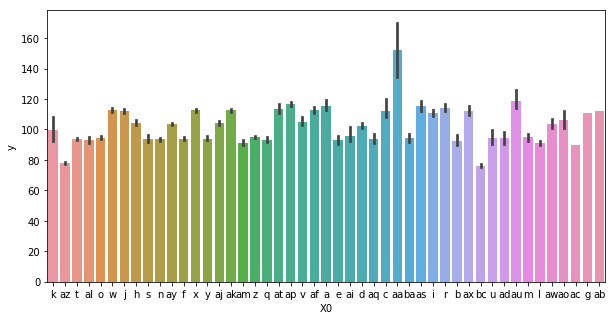

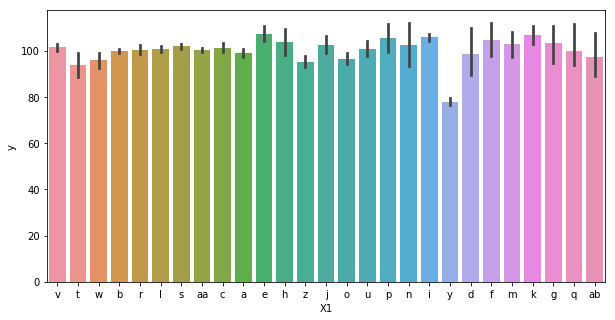

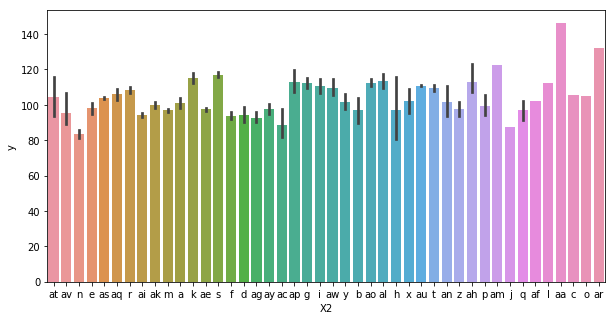

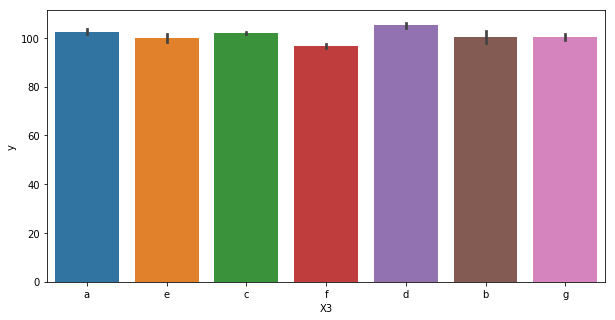

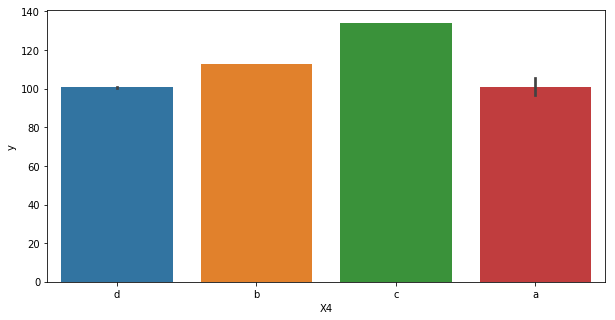

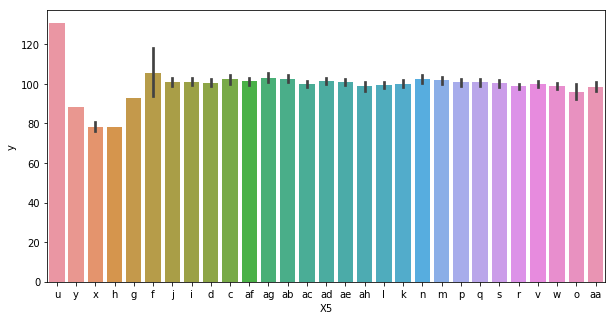

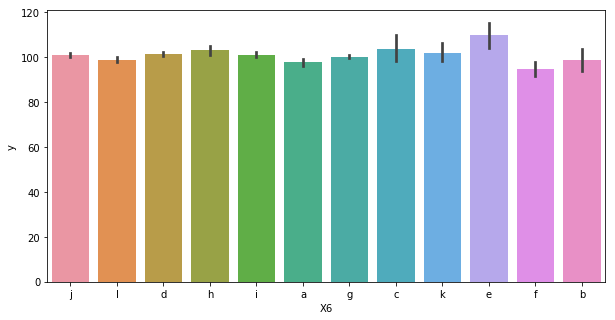

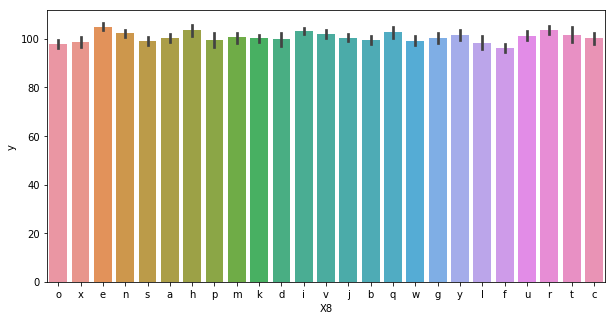

In [19]:
for var in cat_vars:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x = var, y = "y" , data = data)

# Count encoder

In [20]:
import category_encoders as ce

# Create the encoder itself
Count_enc = ce.CountEncoder(cols=cat_vars)
# Fit the encoder using the categorical features 
Count_enc.fit(data[cat_vars], data["y"])

data = data.join(Count_enc.transform(data[cat_vars]).add_suffix('_count'))
dtest = dtest.join(Count_enc.transform(dtest[cat_vars]).add_suffix('_count'))

In [21]:
data = data.drop(data[cat_vars], axis = 1)
dtest = dtest.drop(dtest[cat_vars], axis = 1)

# Feature Scaling

In [22]:
cat_count = ['X0_count', 'X1_count', 'X2_count', 'X3_count',
       'X4_count', 'X5_count', 'X6_count', 'X8_count']

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[cat_count])
data[cat_count] = scaler.transform(data[cat_count])
dtest[cat_count] = scaler.transform(dtest[cat_count])
print(scaler.data_max_)

[ 360.  833. 1659. 1942. 4205.  231. 1042.  277.]


In [24]:
data.describe()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X384,X385,X0_count,X1_count,X2_count,X3_count,X4_count,X5_count,X6_count,X8_count
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.000475,0.001426,0.637250,0.590347,0.494428,0.637112,0.999050,0.846654,0.704728,0.495219
std,2437.608688,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.021796,0.037734,0.304553,0.310549,0.415909,0.369128,0.030813,0.152854,0.316334,0.319015
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.484680,0.298795,0.159228,0.203183,1.000000,0.843478,0.462136,0.107345
50%,4220.000000,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.746518,0.707229,0.298552,0.540584,1.000000,0.895652,0.595146,0.531073
75%,6314.000000,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.869081,0.716867,1.000000,1.000000,1.000000,0.926087,0.997087,0.774011
max,8417.000000,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Define X and y

In [26]:
data =  data.drop("ID" , axis = 1)

In [27]:
X = data.drop("y" , axis =  1)
y = data["y"]
X.shape

(4209, 364)

In [28]:
X= X.values
y = y.values

## Train test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size = 0.2 )

# Build and train the CNN model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [31]:
batch_size = 150
epochs =100
# input image dimensions
img_rows, img_cols = 28, 13
#inputshape = X.shape[1]

In [32]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (3367, 28, 13, 1)
3367 train samples
842 test samples


In [33]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

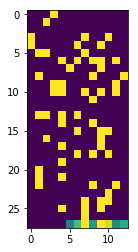

In [34]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28,13))

In [35]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 11, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 5, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4160)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2130432   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [36]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 3367 samples, validate on 842 samples
Epoch 1/100
 - 4s - loss: 3500.7546 - r2_keras: -2.2568e+01 - val_loss: 891.8138 - val_r2_keras: -4.1575e+00
Epoch 2/100
 - 0s - loss: 327.2372 - r2_keras: -1.1247e+00 - val_loss: 206.2392 - val_r2_keras: -1.0581e-01
Epoch 3/100
 - 0s - loss: 180.0225 - r2_keras: -2.0866e-01 - val_loss: 197.6296 - val_r2_keras: -5.8625e-02
Epoch 4/100
 - 0s - loss: 155.0658 - r2_keras: -1.7774e-02 - val_loss: 180.4105 - val_r2_keras: 0.0469
Epoch 5/100
 - 0s - loss: 137.6375 - r2_keras: 0.1014 - val_loss: 158.1995 - val_r2_keras: 0.1751
Epoch 6/100
 - 0s - loss: 122.6041 - r2_keras: 0.2056 - val_loss: 143.9878 - val_r2_keras: 0.2582
Epoch 7/100
 - 0s - loss: 108.1788 - r2_keras: 0.3019 - val_loss: 131.8276 - val_r2_keras: 0.3284
Epoch 8/100
 - 0s - loss: 96.1756 - r2_keras: 0.3709 - val_loss: 125.2561 - val_r2_keras: 0.3659
Epoch 9/100
 - 0s - loss: 91.0831 - r2_keras: 0.4105 - val_loss: 117.3626 - val_r2_keras: 0.4131
Epoch 10/100
 - 0s - loss: 85.3847 - 

In [37]:
print('Test loss:', score)

Test loss: [101.97639117614673, 0.5480872988700867]


# visualise the predictions and residuals

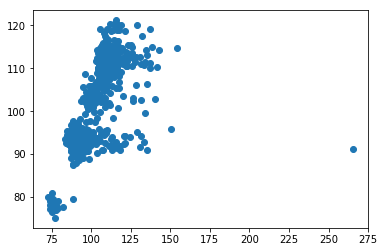

In [38]:
preds = model.predict(X_test)
preds = preds[:,0]
plt.scatter(y_test, preds)

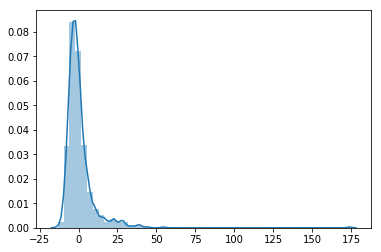

In [39]:
residuals = y_test - preds
sns.distplot(residuals)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)  

0.4497994035127404

# testing

In [41]:
test_data = dtest.drop("ID", axis=1).copy()
#test_data = dtest[selectedFeatures].copy()

X = test_data.values
X.shape

(4209, 364)

In [42]:
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    
    input_shape = (img_rows, img_cols, 1)

X = X.astype('float32')

print('X shape:', X.shape)

print(X.shape[0], 'test samples')

X shape: (4209, 28, 13, 1)
4209 test samples


In [43]:
prediction = model.predict(X)

In [44]:
prediction = prediction[:,0]

In [45]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X8_count
dtypes: float64(8), int64(357)
memory usage: 11.7 MB


In [46]:
submission = pd.DataFrame({
        "ID": dtest["ID"],
        "y": prediction
    })

submission.to_csv('submission_NNs.csv', index=False)